<a href="https://colab.research.google.com/github/Jorge-89/Regresiones_TP_UNSAM/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy
import pandas as pd
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresion-Lineal-/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [45]:

x= df[[ 'Temp_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 
       'Temp_San Miguel - Listello', 
       'Temp_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]

In [46]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
#Estandarizo las features, las redes son muy sensibles a datos no escalados.
scaler_labels = StandardScaler()
x_train = scaler_labels.fit_transform(x_train)
x_test = scaler_labels.transform(x_test)

In [48]:
import numpy as np
y_train = np.asarray(y_train)

In [49]:
# Introducing the stars
import tensorflow as tf
from tensorflow import keras

In [98]:
#Defino la función neuronal
def define_model():
    keras.backend.clear_session()
    
    model = keras.models.Sequential()

 
    

    # 2 capas ocultas con función de activación linear, podemos usar tambien relu.
     
               
    model.add(keras.layers.Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dense(4,  kernel_initializer='normal', activation='relu'))
   

    

    # Capa de salida
    model.add(keras.layers.Dense(1,kernel_initializer='normal', activation='relu'))
    model.compile(loss='mse', metrics=['mse', 'mae'], optimizer="rmsprop")

   
    return model





In [102]:
model = define_model()
# Hago una corrida sin metodo de regularizacion.  
history = model.fit(epochs=100, batch_size=32, x=x_train, y=y_train, validation_data=(x_test, y_test) )
#                     callbacks=[early,])



Train on 8294 samples, validate on 2074 samples
Epoch 1/100
8294/8294 [==============================] - 0s 57us/sample - loss: 526.4931 - mse: 526.4931 - mae: 22.1922 - val_loss: 519.3726 - val_mse: 519.3726 - val_mae: 22.0413
Epoch 2/100
8294/8294 [==============================] - 0s 35us/sample - loss: 307.2519 - mse: 307.2521 - mae: 16.2269 - val_loss: 29.3595 - val_mse: 29.3595 - val_mae: 5.2075
Epoch 3/100
8294/8294 [==============================] - 0s 35us/sample - loss: 2.3567 - mse: 2.3567 - mae: 1.0150 - val_loss: 0.8097 - val_mse: 0.8097 - val_mae: 0.6937
Epoch 4/100
8294/8294 [==============================] - 0s 36us/sample - loss: 0.6906 - mse: 0.6906 - mae: 0.6594 - val_loss: 0.7391 - val_mse: 0.7391 - val_mae: 0.6702
Epoch 5/100
8294/8294 [==============================] - 0s 35us/sample - loss: 0.6843 - mse: 0.6843 - mae: 0.6569 - val_loss: 0.7280 - val_mse: 0.7280 - val_mae: 0.6802
Epoch 6/100
8294/8294 [==============================] - 0s 35us/sample - loss: 0.679

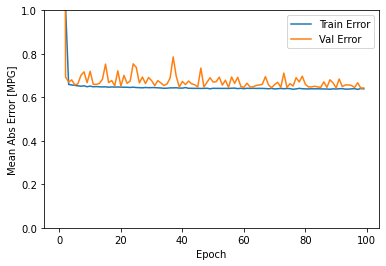

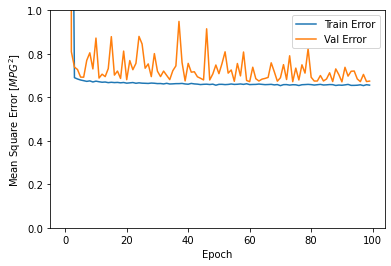

In [104]:


# se puede observar como el error de entrenamiento va disminuyendo, pero el de validación aumenta. Un claro sobreajuste
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

In [105]:
y_pred_test = model.predict(x_train)
y_pred_test

array([[24.43674 ],
       [26.963165],
       [14.490628],
       ...,
       [33.914684],
       [27.526617],
       [29.075344]], dtype=float32)

In [106]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared= True)

print (score_testeo)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.6746579744396354


In [64]:
#se importa el set de datos final
url = 'https://raw.githubusercontent.com/Jorge-89/Regresiones_TP_UNSAM/main/base_datos_estaciones_met_V3_test.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [65]:
x= df[[ 'Temp_Las Varas AgriculturaCba', 
        'Temp_San Miguel - Establecimiento Don Luis', 
       'Temp_San Miguel - Listello', 
       'Temp_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]

In [145]:
len(y)

2592

In [36]:
#Estandarizo las features, las redes son muy sensibles a datos no escalados.
scaler_labels = StandardScaler()
x_final = scaler_labels.fit_transform(x)


In [68]:
x

,Temp_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Temp_ San Miguel - Las Varillas
0,19.9,18.1,19.0,18.7
1,19.9,18.0,18.9,18.6
2,19.6,18.0,18.8,18.5
3,19.6,18.0,18.7,18.5
4,19.8,18.0,18.7,18.4
...,...,...,...,...
2587,14.8,12.9,12.3,13.4
2588,14.7,12.8,12.2,13.2
2589,14.6,12.7,12.1,13.1
2590,14.6,12.7,12.1,13.0


In [69]:
y_pred = model.predict(x)
y_pred

array([[19.568205 ],
       [19.501616 ],
       [19.362982 ],
       ...,
       [14.09113  ],
       [14.057369 ],
       [14.0390625]], dtype=float32)

In [70]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y,y_pred,squared= True)

print (score_testeo)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.5524412578541179


In [71]:
# To start from scratch, siempre aplicar esto antes de tocar otros hiperparametros o construir otro modelo, mas info en https://keras.io/api/utils/backend_utils/
keras.backend.clear_session()




In [72]:
#Early es un buen metodo de regularizacion, en patience aplicamos un 30 para que al menos tengan que pasar 20 epoch antes de hacer una parada.
early = keras.callbacks.EarlyStopping(patience=30, monitor='val_loss', restore_best_weights=True)

In [73]:
 model = define_model()
 
 #en regresión las loss usada es mse y como metrica tambien la podemos usar, como optimizador es sumamente usado Adam
 model.fit(epochs=150, batch_size=32, x=x_train, y=y_train, validation_data=(x_test, y_test),
                    callbacks=[early])

Train on 8294 samples, validate on 2074 samples
Epoch 1/150
8294/8294 [==============================] - 0s 51us/sample - loss: 176.4243 - mse: 176.4243 - mae: 9.0830 - val_loss: 0.7199 - val_mse: 0.7199 - val_mae: 0.6656
Epoch 2/150
8294/8294 [==============================] - 0s 32us/sample - loss: 0.6868 - mse: 0.6868 - mae: 0.6570 - val_loss: 0.7202 - val_mse: 0.7202 - val_mae: 0.6625
Epoch 3/150
8294/8294 [==============================] - 0s 32us/sample - loss: 0.6859 - mse: 0.6859 - mae: 0.6566 - val_loss: 0.7198 - val_mse: 0.7198 - val_mae: 0.6676
Epoch 4/150
8294/8294 [==============================] - 0s 32us/sample - loss: 0.6854 - mse: 0.6854 - mae: 0.6563 - val_loss: 0.7151 - val_mse: 0.7151 - val_mae: 0.6618
Epoch 5/150
8294/8294 [==============================] - 0s 32us/sample - loss: 0.6827 - mse: 0.6827 - mae: 0.6545 - val_loss: 0.7145 - val_mse: 0.7145 - val_mae: 0.6604
Epoch 6/150
8294/8294 [==============================] - 0s 33us/sample - loss: 0.6824 - mse: 0.68

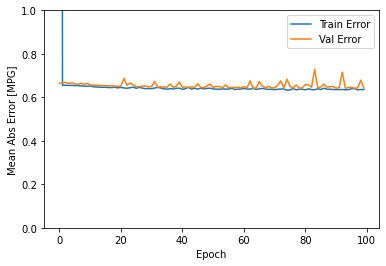

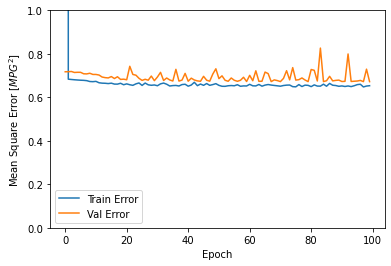

In [74]:
# vemos como se regula el modelo evitando el sobreajuste

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

In [112]:
y_pred_test = model.predict(x_test)
y_pred_test

array([[24.43674 ],
       [26.963165],
       [14.490628],
       ...,
       [33.914684],
       [27.526617],
       [29.075344]], dtype=float32)

In [110]:
y_pred_test = model.predict(x)
y_pred_test

array([[19.522167],
       [19.452732],
       [19.321339],
       ...,
       [14.020491],
       [13.987162],
       [13.963021]], dtype=float32)

In [114]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared= True)

print (score_testeo)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.6746579744396354


In [77]:
model.evaluate(x_test, y_test)

2074/2074 [==============================] - 0s 18us/sample - loss: 0.6724 - mse: 0.6724 - mae: 0.6429


[0.6724344183876751, 0.6724344, 0.64286876]

In [ ]:
#Veamos como se comporta el modelo con CV y con hiperparametros obtenidos de GriSearchCV 
   
    # To start from scratch
keras.backend.clear_session()
#Luego de tener un modelo con regularización es conveniente usar un CV y tener un mse para ver como se comporta con datos que nunca observo.
regressor = KerasRegressor(build_fn = define_model, batch_size = 32, epochs = 58)
errores = cross_val_score(regressor, x_test, y_test, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)
errores = -errores
errores

array([0.5915357 , 0.6934612 , 0.77006715, 0.59810498, 0.74754497])

In [ ]:
#Un MSE promedio parecido al obtenido con early, no se observa mucha varianza en los 5 errores del CV
print(errores.mean(), errores.std())

0.6801428011113156 0.07401113926438624


**Esta parte es opcional, ya que se construye una grilla para saber que hiperparametros pueden ser mejores, pero consume al menos 1 hora.**

In [93]:
def define_model(optimizer,activation):
#Defino la función neuronal

    keras.backend.clear_session()
    
    model = keras.models.Sequential()

 
    

    # 2 capas ocultas con función de activación linear, podemos usar tambien relu.
     
               
    model.add(keras.layers.Dense(8, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dense(8,  kernel_initializer='normal', activation='relu'))
   

    

    # Capa de salida
    model.add(keras.layers.Dense(1,kernel_initializer='normal', activation='relu'))
    model.compile(loss='mse', metrics=['mse', 'mae'], optimizer="Adam")

   
    return model

In [91]:
keras.backend.clear_session()

In [92]:

regressor = KerasRegressor(build_fn = define_model)


In [88]:
parameters= {"batch_size": [25,32], "epochs":[100,200], "optimizer":["Adam", "rmsprop"], "activation":["relu","linear"]}

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
grilla = GridSearchCV(estimator=regressor, param_grid= parameters,scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
                      
                      
grilla.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.8min


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 22.9min finished


Train on 8294 samples
Epoch 1/100
8294/8294 [==============================] - 0s 40us/sample - loss: 330.0882 - mse: 330.0880 - mae: 16.4366
Epoch 2/100
8294/8294 [==============================] - 0s 37us/sample - loss: 1.0080 - mse: 1.0080 - mae: 0.7653
Epoch 3/100
8294/8294 [==============================] - 0s 32us/sample - loss: 0.6877 - mse: 0.6877 - mae: 0.6576
Epoch 4/100
8294/8294 [==============================] - 0s 34us/sample - loss: 0.6873 - mse: 0.6873 - mae: 0.6577
Epoch 5/100
8294/8294 [==============================] - 0s 34us/sample - loss: 0.6874 - mse: 0.6874 - mae: 0.6578
Epoch 6/100
8294/8294 [==============================] - 0s 37us/sample - loss: 0.6861 - mse: 0.6861 - mae: 0.6569
Epoch 7/100
8294/8294 [==============================] - 0s 39us/sample - loss: 0.6851 - mse: 0.6851 - mae: 0.6565
Epoch 8/100
8294/8294 [==============================] - 0s 33us/sample - loss: 0.6833 - mse: 0.6833 - mae: 0.6560
Epoch 9/100
8294/8294 [==============================

GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000016002156D08>,
             n_jobs=-1,
             param_grid={'activation': ['relu', 'linear'],
                         'batch_size': [25, 32], 'epochs': [100, 200],
                         'optimizer': ['Adam', 'rmsprop']},
             scoring='neg_mean_squared_error', verbose=1)

In [96]:
grilla.best_params_

{'activation': 'linear',
 'batch_size': 32,
 'epochs': 100,
 'optimizer': 'rmsprop'}

In [107]:
grilla.best_score_

-0.6491067808773956

In [ ]:
# Fit best model
modelo=grilla.best_estimator_


In [ ]:

#se puede usar scoring='neg_root_mean_squared_error' tambien que seria la raiz
MSE_modelo=cross_val_score(modelo,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
errores = -MSE_modelo
MSE_modelo

Epoch 1/100
52/52 [==============================] - 0s 1ms/step - loss: 513.0964 - mse: 513.0964 - mae: 21.8877
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 264.8586 - mse: 264.8586 - mae: 14.4842
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 78.5746 - mse: 78.5746 - mae: 7.3262
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 60.6968 - mse: 60.6968 - mae: 6.4488
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 39.7255 - mse: 39.7255 - mae: 5.2634
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 17.8972 - mse: 17.8972 - mae: 3.4869
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 5.7775 - mse: 5.7775 - mae: 1.9226
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 2.1890 - mse: 2.1890 - mae: 1.1530
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 1.2406 - mse: 1.2406 - mae: 0.8505
Epoch 10/1

array([-0.64012906, -0.69026436, -0.76764861, -0.60549866, -0.7820173 ])

In [ ]:
print(errores.mean(), errores.std())

0.6971115972038222 0.06909598209430678
